In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

In [2]:
x_4 = np.linspace(start = -2 , stop = 2 , num = 200)
y_4 = np.linspace(start = -2 , stop = 2 , num = 200)

In [3]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [4]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [5]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [6]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


ValueError: Argument Z must be 2-dimensional.

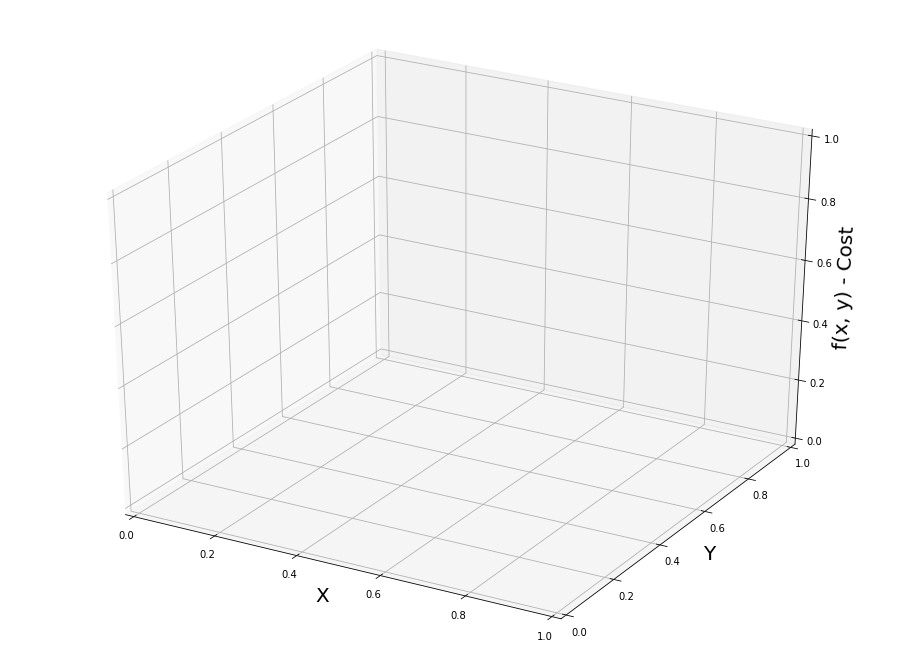

In [9]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [10]:
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]  :', hs_band[0])
print('hs_band[0][1]   :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]  : ['Black Thought' 'MC']
hs_band[0][1]   : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']
